# Differential Equations 2

Real life problems frequently involve more than one dependent variable. Fortunately little about our previous Runge-Kutta approach needs to change to handle these problems.

First, since we're using computers and we want to write flexible code, we'll turn our dependent variable into a list or array to account for the new term(s). 

Second, the function $f(\vec{r}, t)$ will now compute both/all the relevant equations and return the appropriate list/array.

Consider the simultaneous equations:

$$
\frac{dx}{dt} = xy -x , \qquad \frac{dy}{dt} = y- xy + \sin^2\omega t
$$

Perhaps beginning with previous code, write a program to solve these equations from $t=0$ to $t=10$ given $\omega = 1$, with $ x = y = 0$ at $t=0$. Now that we know fourth-order Runge-Kutta is only a few more lines of code than simpler methods, it should be our first choice going forward.

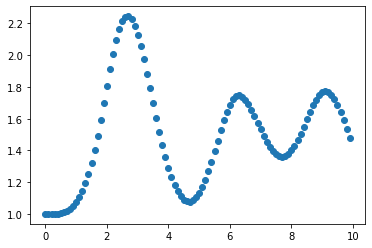

In [ ]:
# code

import numpy as np
import matplotlib.pyplot as plt

# Method to advance the spatial vector r. r will be an array with an x  component: r[0], y component: r[1]
def partial(r,t, w = 1):
    dx = r[0]*r[1] - r[0] # xy -x 
    dy = r[1] - r[0]*r[1] + np.sin(w*t)**2 # y - xy + sin^2(wt)
    return np.array([dx,dy])

# Initializing conditions. Setting up x0, y0 as (1,1)
r = np.array([1,1])
xVals = []
yVals = []
w = 1
t0 = 0
tf = 10
N = 100
h = (tf-t0)/N
timeVals = np.arange(t0,tf,h)


for i in timeVals:
    xVals.append(r[0])
    yVals.append(r[1])
    k1 = h * partial(r,i)
    k2 = h * partial(r + 0.5*k1, i + 0.5*h)
    k3 =  h * partial(r + 0.5*k2, i + 0.5*h)
    k4 = h * partial(r + k3, i + h)
    r = r + 1/6 * (k1 + 2*k2 + 2*k3 + k4)

plt.figure()
plt.scatter(timeVals,xVals) 
plt.show()


## Second Order Differential Equations

Section 8.3 discussed a simple method for dealing with second order differential equations: create a system of equations where the first order equation is one of the equations.

Example 8.6 defines a new function $d\theta \over dt$ $ = \omega$ in order to turn the second order equation $d^2 \theta \over dt^2 $ $= - \frac{g}{l} \sin \theta$ into two first order equations for $\theta$ and $\omega$. The function to use for $f(\vec{r}, t)$ and some constants are given as well. I've copied over the given code for you. Complete the exercise by adding the Runge-Kutta code and plotting.

In [1]:
g = 9.81
l = 0.1

def f(r,t):
    theta = r[0]
    omega = r[1]
    d_theta = omega
    d_omega = - (g / l) * np.sin(theta)
    return np.array([d_theta, d_omega], float)

# runge-kutta here
thetaVals = []
wVals = []

for i in timeVals:
    thetaVals.append(r[0])
    wVals.append(r[1])
    k1 = h * f(r,i)
    k2 = h * f(r + 0.5*k1, i + 0.5*h)
    k3 =  h * f(r + 0.5*k2, i + 0.5*h)
    k4 = h * f(r + k3, i + h)
    r = r + 1/6 * (k1 + 2*k2 + 2*k3 + k4)

plt.figure()
plt.plot(timeVals,thetaVals) 
plt.show()

NameError: name 'timeVals' is not defined